# Data Visualization with Python Matplotlib for Beginner - Part 2

## Jenis-Jenis Visualisasi Data dan Tujuannya

### Mengenal Jenis-Jenis Visualisasi Data dan Tujuannya

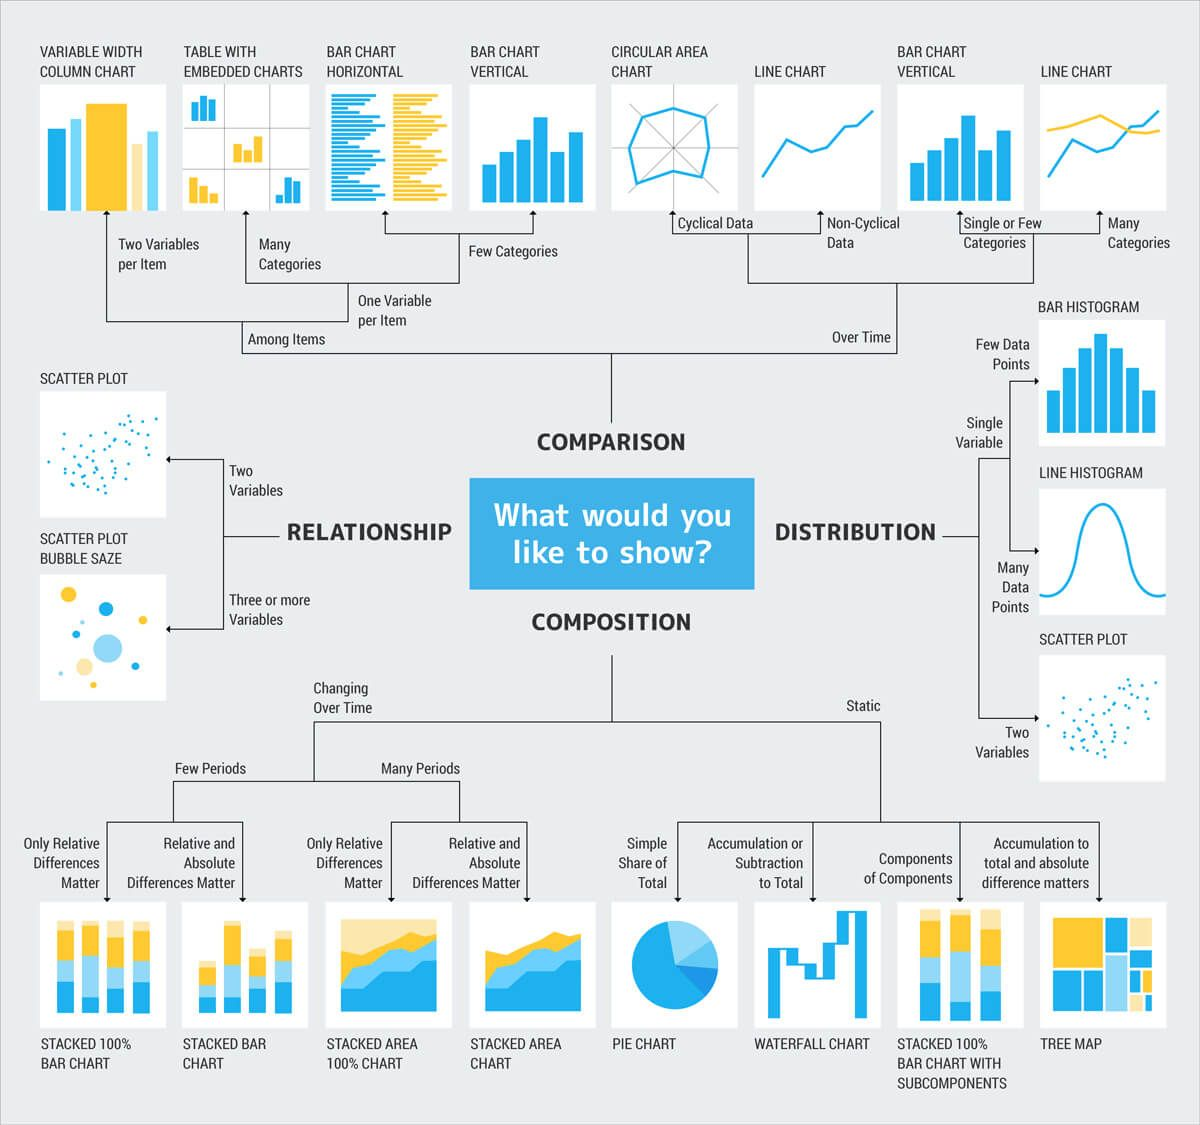

1. Perbandingan/Komparasi

Jika ingin membandingkan suatu sekumpulan nilai dengan nilai lainnya, ingin melihat mana yang lebih besar, mana yang lebih tinggi, mana yang naik, dsb. Untuk data yang terkait dengan waktu, visualisasi yang digunakan biasanya berupa line-chart. Sedangkan, jika yang dibandingkan adalah kategorikal, maka lebih cocok menggunakan bar-chart.

2. Distribusi

Bila ingin melihat distribusi/persebaran data di suatu variabel. Visualisasi yang lazim digunakan adalah histogram. Bisa melihat apakah datanya banyak terkumpul di nilai-nilai kecil, berat di kanan, atau simetris, ataupun berdistribusi normal. Untuk melihat distribusi di dua variabel, scatterplot juga bisa digunakan.

3. Komposisi

Digunakan untuk melihat komposisi dari suatu variabel, jika di-breakdown terhadap suatu dimensi data. Visualisasi yang biasa digunakan adalah stacked bar-chart untuk data kategorikal, atau stacked line-chart untuk data terkait waktu.

4. Keterhubungan/Relasi

Ketika ingin melihat keterhubungan antara suatu variabel dengan variabel lain. Misalnya ingin cek, jika variabel A semakin tinggi, apakah variabel B juga semakin tinggi, atau justru lebih rendah, atau tidak ada keterhubungannya. Visualisasi yang biasa digunakan untuk tujuan ini adalah scatter-plot.



### Quiz
Histogram biasanya digunakan untuk tujuan ...

JAWABAN

Distribusi

### Quiz
Jika ada tiga atau lebih variabel yang akan digunakan untuk menyajikan suatu data ke dalam grafik agar dapat digambarkan relasinya, jenis grafik manakah yang akan digunakan?

JAWABAN

Scatter plot with bubble size

### Quiz
Untuk kasus perubahan volume penjualan tiap minggunya dalam satu tahun dengan telah berhasilnya beberapa produk dijual, grafik manakah yang cocok digunakan untuk memvisualisasikan data demikian?

JAWABAN

line chart

### Quiz
Untuk kasus perubahan volume penjualan tiap minggunya dalam satu tahun, dan ingin dilihat komposisi untuk masing-masing segment, grafik manakah yang cocok digunakan untuk memvisualisasikan data demikian?

JAWABAN

Stacked area chart

## Membuat Multi-line Chart dan Kustomisasi Lanjutan

### Membuat Multi-Line Chart

In [ ]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize='15')
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

### Kustomisasi Legend

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

### Quiz
Mana yang bukan nilai parameter loc yang benar untuk legend?

JAWABAN

inside

### Kustomisasi Colormap

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.clf()
dataset.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Bearkdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

### Membuat Line Chart GMV Breakdown by Top Provinces

In [ ]:
import datetime
import pandas as pd

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

### Quiz
Parameter cmap dimasukkan ke dalam function ...

JAWABAN

plot

### Membuat Anotasi


In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000), xytext=(4, 1700000000), weight='bold', color='red', arrowprops=dict(arrowstyle='fancy',connectionstyle='arc3',color='red'))

# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000), xytext=(0, 3700000000), weight='bold', color='red', arrowprops=dict(arrowstyle='->', connectionstyle="angle", color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

## Membuat Pie-Chart dan Bar-Chart

### Membuat Subset Data

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset_dki_q4 = dataset[(dataset['province'] == 'DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

### Membuat Pie Chart

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

### Membuat Bar Chart

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

### Membuat Multi-Bar Chart

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV per City, Breakdown by Month\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Amount(in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Membuat Stacked Chart

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

dataset_dki_q4.groupby(['order_month', 'city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Quiz
Apa yang harus ditambahkan di code untuk membuat stacked bar chart?

JAWABAN

Parameter kind=’bar’ dan stacked=True di function plot

## Membuat Histogram dan Scatterplot

### Membuat Agregat Data Customer

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders', ascending=False))

### Membuat Histogram - Part 1

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize= 12)
plt.ylabel('Number of Customers', fontsize= 12)
plt.show()

### Membuat Histogram - Part 2


In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize= 12)
plt.ylabel('Number of Customers', fontsize= 12)
plt.xlim(xmin=0, xmax=200)
plt.show()

### Membuat Histogram - Part 3

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakartain Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

### Quiz
Berikut adalah perbedaan bar chart dan histogram, kecuali ...

JAWABAN

Bar chart punya sumbu-x dan sumbu-y, sedangkan histogram hanya punya salah satu

### Membuat Scatterplot

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakartain Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

### Quiz
Jika quantity dan GMV berkorelasi positif, maka ...

JAWABAN

Ketika dibuat scatterplot, titik-titiknya membentuk pola ke kanan atas

## Mini Project

### Case 1: Menentukan brand top 5


In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print(top_brands)

### Case 2: Multi-line chart daily quantity untuk brand top 5

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi Lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

### Case 3: Kuantitas penjualan brand top 5 selama Desember 2019

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Number of Products', fontsize = 15)
plt.ylabel('Brand',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

### Case 4: Penjulan produk diatas 100 dan dibawah 100 selama Desember 2019

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

### Case 5: Murah atau mahalkah harga produk brand top 5

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

### Case 6a: Korelasi quantity vs GMV

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\n Top 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

### Case 6b: Korelasi median harga vs quantity

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()